In [1]:
import pandas as pd
import numpy as np

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
#data validation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.shape

(200, 5)

In [6]:
data.count()

Unnamed: 0    200
TV            200
radio         200
newspaper     200
sales         200
dtype: int64

In [7]:
#missing value calculation
data.shape[0]-data.count()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
#to find missing values
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [9]:
#typo errors
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
updated_col=['srno','tv','radio','newspaper','sales']
updated_col

['srno', 'tv', 'radio', 'newspaper', 'sales']

In [11]:
data.columns=updated_col

In [12]:
data.head()

,srno,tv,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
#Box Plot

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

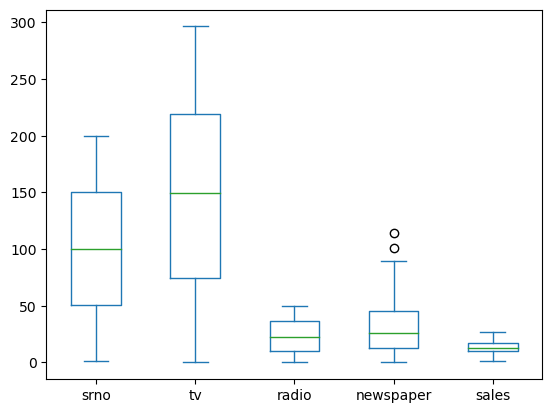

In [16]:
data.plot(kind="box")

<Figure size 800x800 with 0 Axes>

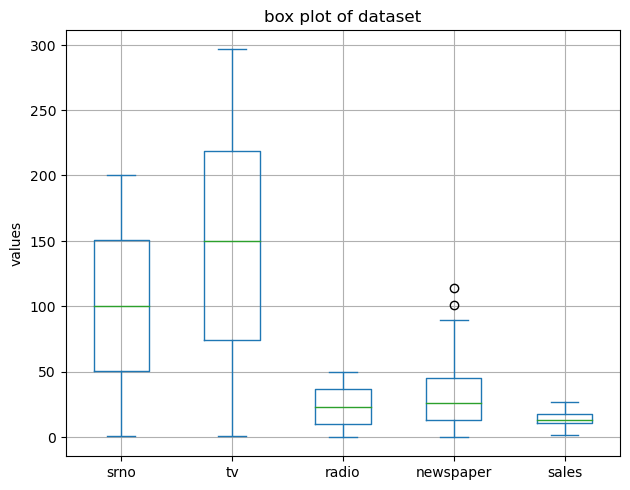

In [17]:
plt.figure(figsize=(8,8))
data.plot(kind="box")
plt.ylabel("values")
plt.tight_layout()
plt.title(f"box plot of dataset")
plt.grid()
plt.show()

In [18]:
number=50
print(number)

50


In [19]:
print("number",number)

number 50


In [20]:
print(f"number is {number} my lucky number is {number}")

number is 50 my lucky number is 50


In [21]:
#remove outliers
data.newspaper

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: newspaper, Length: 200, dtype: float64

In [22]:
data["newspaper"]

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: newspaper, Length: 200, dtype: float64

In [23]:
data["newspaper"].quantile(0.99)

89.5149999999999

In [24]:
upper_acceptable_value=data["newspaper"].quantile(0.99)
print(f"upper_acceptable_value {upper_acceptable_value}")
data["newspaper"]>upper_acceptable_value

upper_acceptable_value 89.5149999999999


0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: newspaper, Length: 200, dtype: bool

In [25]:
upper_acceptable_value=data["newspaper"].quantile(0.99)
print(f"upper_acceptable_value {upper_acceptable_value}")
data[data["newspaper"]>upper_acceptable_value]

upper_acceptable_value 89.5149999999999


,srno,tv,radio,newspaper,sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [26]:
data["newspaper"].median()

25.75

In [27]:
md=data["newspaper"].median()
print(f"median value of newspaper is {md}")
data.loc[data["newspaper"]>upper_acceptable_value]=md

median value of newspaper is 25.75


In [28]:
data[data["newspaper"]>upper_acceptable_value]

,srno,tv,radio,newspaper,sales


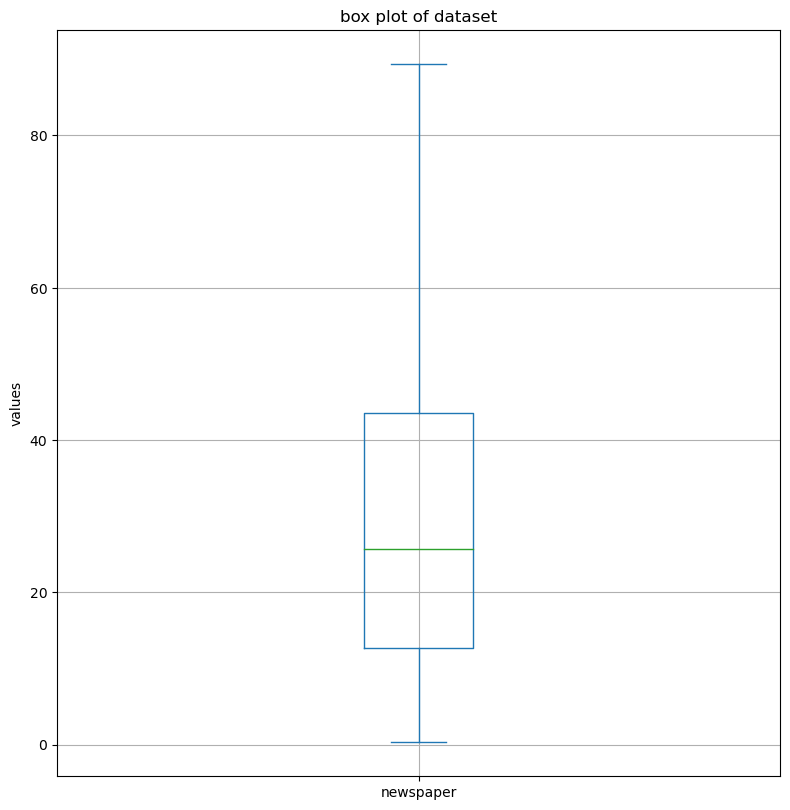

In [29]:
plt.figure(figsize=(8,8))
data["newspaper"].plot(kind="box")
plt.ylabel("values")
plt.tight_layout()
plt.title(f"box plot of dataset")
plt.grid()
plt.show()

In [30]:
x=data.drop(["sales"],axis=1)

In [31]:
data.columns

Index(['srno', 'tv', 'radio', 'newspaper', 'sales'], dtype='object')

In [32]:
pratha_corr=data.corr()
pratha_corr

,srno,tv,radio,newspaper,sales
srno,1.000000,0.028934,-0.106577,-0.133317,-0.081493
tv,0.028934,1.000000,0.048973,0.052042,0.721132
radio,-0.106577,0.048973,1.000000,0.345894,0.566254
newspaper,-0.133317,0.052042,0.345894,1.000000,0.209691
sales,-0.081493,0.721132,0.566254,0.209691,1.000000


<Axes: >

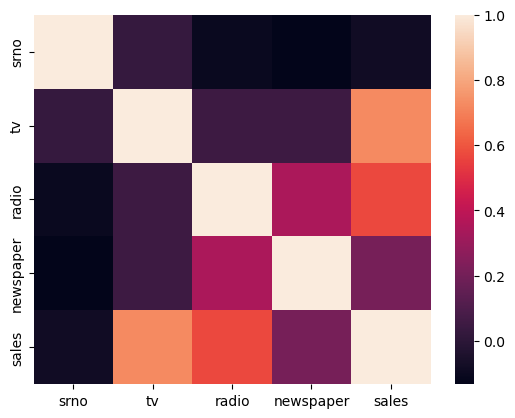

In [33]:
sns.heatmap(pratha_corr)

<Axes: >

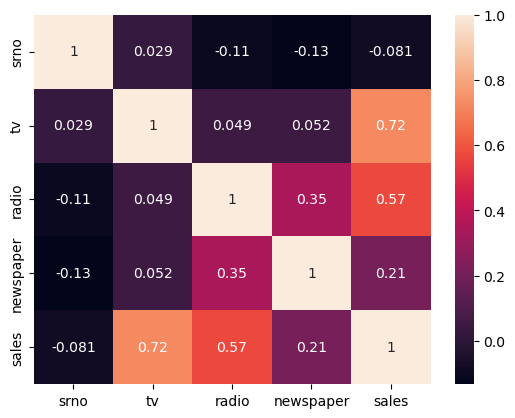

In [34]:
sns.heatmap(pratha_corr,annot=True)

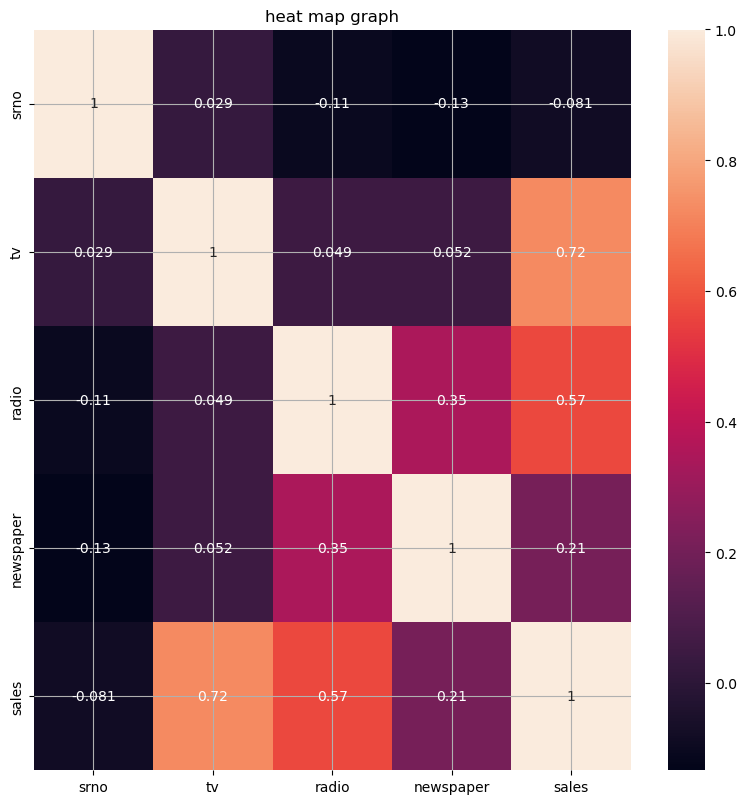

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(pratha_corr,annot=True)
plt.tight_layout()
plt.title(f"heat map graph")
plt.grid()
plt.show()

In [36]:
x=data.drop(["srno","sales"],axis=1)
x

,tv,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [37]:
y=data["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,shuffle=True)
print(f"x training {x_train.shape}")
print(f"y training {y_train.shape}")
print(f"x testing {x_test.shape}")
print(f"y testing {y_test.shape}")

x training (160, 3)
y training (160,)
x testing (40, 3)
y testing (40,)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [41]:
select_models=[LinearRegression(),
              DecisionTreeRegressor(max_depth= None,min_samples_leaf= 1,min_samples_split= 2),
              RandomForestRegressor(max_depth= None,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 100)]

In [42]:
my_rmse=[]
my_r_square=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse}  and R Squared value {my_r_square} of model {model}")

RMSE value [1.4983414997969908]  and R Squared value [0.9091048238828131] of model LinearRegression()
RMSE value [1.4983414997969908, 1.1568275584545864]  and R Squared value [0.9091048238828131, 0.9581353371227644] of model DecisionTreeRegressor()
RMSE value [1.4983414997969908, 1.1568275584545864, 1.3790143694864083]  and R Squared value [0.9091048238828131, 0.9581353371227644, 0.9302490326281994] of model RandomForestRegressor()


In [43]:
result=[my_rmse,my_r_square]
result

[[1.4983414997969908, 1.1568275584545864, 1.3790143694864083],
 [0.9091048238828131, 0.9581353371227644, 0.9302490326281994]]

In [44]:
pd.DataFrame(data=result,columns=["LR","DTC","RF"], index=["rmse","R Square"])

,LR,DTC,RF
rmse,1.498341,1.156828,1.379014
R Square,0.909105,0.958135,0.930249


In [45]:
#rf=RandomForestRegressor(n_estimators=20,max_depth=4,min_samples_split=30,min_samples_leaf=3)
#rf

In [46]:
#param_grid={
#    'n_estimators':[100,200,300,350], #number of tree in the forest
#   'max_depth':[None,10,20,30], #maximum depth of the tree
#    'min_samples_split':[2,5,10], #minimum number of samples required to split an internal node
#   'min_samples_leaf':[1,2,4], #minimum number of samples required to be at a leaf node
#}

In [47]:
#from sklearn.model_selection import GridSearchCV
#grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1)
#n_jobs=-1 for faster computation/parallization?

#fit the model with different hyper parameters combinations
#grid_search.fit(x_train,y_train)

#get the best hyper parameters
#best_params=grid_search.best_params_
#best_model=grid_search.best_estimator_

In [48]:
#best_params
#max_depth= None,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 100

# random hyper parameters
1.DecisionTreeRegressor(max_depth=4,min_samples_split=30,min_samples_leaf=3),
2.RandomForestRegressor(n_estimators=20,max_depth=4,min_samples_split=30,min_samples_leaf=3)
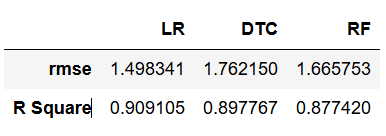

# grid hyper parameters
1.DecisionTreeRegressor(max_depth=4,min_samples_split=30,min_samples_leaf=3), 
2.RandomForestRegressor(n_estimators=20,max_depth=4,min_samples_split=30,min_samples_leaf=3)
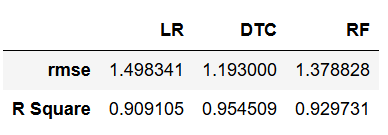